# Transfer Learning with Keras

### Cats vs Dogs classification
> Dataset - https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

> Pre-trained Weights -  https://storage.googleapis.com/mledu-datasetsinception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

## Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/cats_and_dogs_filtered.zip"

Archive:  /content/gdrive/My Drive/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/

In [ ]:
train_dir = 'cats_and_dogs_filtered/train/'
validation_dir = 'cats_and_dogs_filtered/validation/'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['cats', 'dogs']
['cats', 'dogs']


In [ ]:
#Training images for Cats and Dogs
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#validation images for Cats and Dogs
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_frames = os.listdir(train_cats_dir)
train_dog_frames = os.listdir(train_dogs_dir)

#Viewing the first 10 filenames
print(train_cat_frames[:10])
print(train_dog_frames[:10])

['cat.200.jpg', 'cat.446.jpg', 'cat.540.jpg', 'cat.946.jpg', 'cat.435.jpg', 'cat.729.jpg', 'cat.68.jpg', 'cat.959.jpg', 'cat.58.jpg', 'cat.354.jpg']
['dog.638.jpg', 'dog.930.jpg', 'dog.725.jpg', 'dog.67.jpg', 'dog.288.jpg', 'dog.766.jpg', 'dog.350.jpg', 'dog.36.jpg', 'dog.56.jpg', 'dog.107.jpg']


In [ ]:
print("Number of training cats images: ", len(os.listdir(train_cats_dir)))
print("Number of training dogs images: ", len(os.listdir(train_dogs_dir)))

print("Number of validation cats images: ", len(os.listdir(validation_cats_dir)))
print("Number of validation dogs images: ", len(os.listdir(validation_dogs_dir)))

Number of training cats images:  1000
Number of training dogs images:  1000
Number of validation cats images:  500
Number of validation dogs images:  500


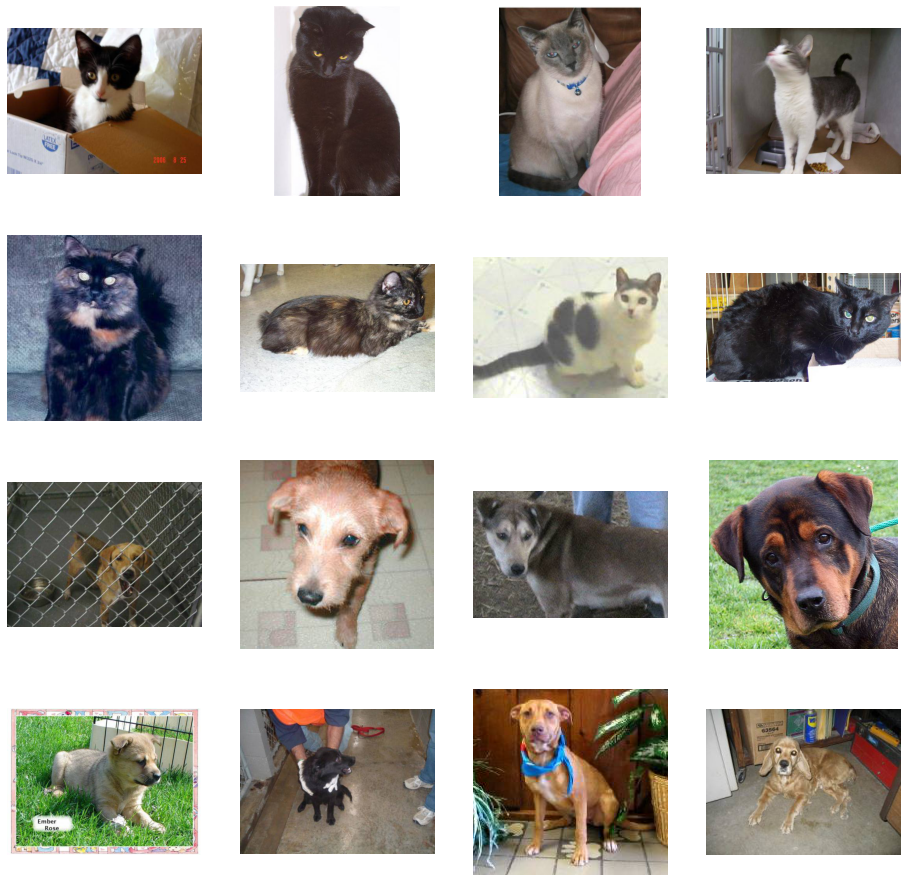

In [ ]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pic = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_frames[ pic_index-8:pic_index] 
               ]

next_dog_pic = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_frames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pic+next_dog_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = npimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(train_cats_dir):
    
    img = npimg.imread(train_cats_dir+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

print(np.mean(d1))
print(np.mean(d2))

499.0
436.0


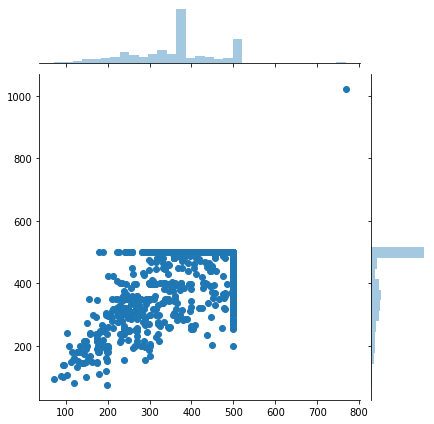

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-07-28 19:10:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/inception_v3_weigh 100%[===================>]  83.84M  77.3MB/s    in 1.1s    

2020-07-28 19:10:53 (77.3 MB/s) - ‘/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [ ]:
local_weights_file = '/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.1
x = layers.Dropout(0.1)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip=True,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    color_mode='rgb',
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using validation_datagen generator
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          color_mode='rgb',
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 97.0%
import tensorflow
from tensorflow.keras.callbacks import Callback
class myCallback(tensorflow.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.970):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 50,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/50
100/100 - 18s - loss: 1.5098 - accuracy: 0.7505 - val_loss: 0.2933 - val_accuracy: 0.9100
Epoch 2/50
100/100 - 17s - loss: 0.5273 - accuracy: 0.8165 - val_loss: 0.1198 - val_accuracy: 0.9460
Epoch 3/50
100/100 - 17s - loss: 0.4973 - accuracy: 0.8110 - val_loss: 0.2980 - val_accuracy: 0.8970
Epoch 4/50
100/100 - 18s - loss: 0.4601 - accuracy: 0.8270 - val_loss: 0.1246 - val_accuracy: 0.9460
Epoch 5/50
100/100 - 17s - loss: 0.4520 - accuracy: 0.8225 - val_loss: 0.5566 - val_accuracy: 0.8710
Epoch 6/50
100/100 - 17s - loss: 0.4067 - accuracy: 0.8440 - val_loss: 0.1147 - val_accuracy: 0.9530
Epoch 7/50
100/100 - 17s - loss: 0.4042 - accuracy: 0.8550 - val_loss: 0.1811 - val_accuracy: 0.9320
Epoch 8/50
100/100 - 17s - loss: 0.3884 - accuracy: 0.8585 - val_loss: 0.1773 - val_accuracy: 0.9340
Epoch 9/50
100/100 - 17s - loss: 0.3650 - accuracy: 0.8650 - val_loss: 0.2327 - val_accuracy: 0.9250
Epoch 10/50
100/100 - 17s - loss: 0.3833 - accuracy: 0.8620 - val_loss: 0.1233 - val_accura

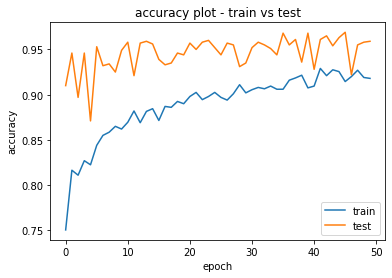

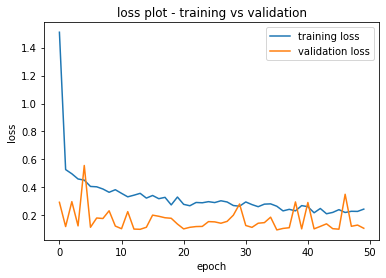

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'cats': 0, 'dogs': 1}


In [ ]:
model.save('saved_model_dir')
converter = tensorflow.lite.TFLiteConverter.from_saved_model('saved_model_dir')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model_dir/assets


162612648

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=20)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")